## Import Library

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score


## Menyiapkan Parameter Model

In [26]:
df = pd.read_csv("heart_disease.csv", delimiter=',')

# Info dataset
print("🔹 Info Dataset:")
print(df.info(), "\n")

# Cek deskripsi awal
print("🔹 Deskripsi Statistik:")
print(df.describe(include="all"), "\n")

# Cek missing values
print("🔹 Jumlah Missing Value Tiap Kolom:")
print(df.isnull().sum(), "\n")

# Mapping penjelasan kolom
parameter_info = {
    "male": "Jenis kelamin (1=Laki-laki, 0=Perempuan)",
    "age": "Usia responden",
    "currentSmoker": "Status perokok (1=Ya, 0=Tidak)",
    "cigsPerDay": "Jumlah rokok per hari",
    "BPMeds": "Sedang konsumsi obat tekanan darah (1=Ya, 0=Tidak)",
    "prevalentStroke": "Riwayat stroke sebelumnya (1=Ya, 0=Tidak)",
    "prevalentHyp": "Riwayat hipertensi (1=Ya, 0=Tidak)",
    "diabetes": "Status diabetes (1=Ya, 0=Tidak)",
    "totChol": "Kadar kolesterol total (mg/dL)",
    "sysBP": "Tekanan darah sistolik (mmHg)",
    "diaBP": "Tekanan darah diastolik (mmHg)",
    "BMI": "Indeks massa tubuh (kg/m²)",
    "heartRate": "Detak jantung (bpm)",
    "glucose": "Kadar glukosa (mg/dL)",
    "TenYearCHD": "Target: Penyakit jantung dalam 10 tahun (1=Ya, 0=Tidak)"
}

# Buat dataframe ringkas parameter
param_df = pd.DataFrame(list(parameter_info.items()), columns=["Kolom", "Penjelasan"])
print("🔹 Daftar Parameter:")
print(param_df)

df.head()

🔹 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
# Tentukan target performa model
target_metrics = {
    "accuracy": 0.70,   # minimal 70%
    "recall": 0.65,     # minimal 65%
    "precision": 0.60,  # minimal 60%
    "f1": 0.65,         # minimal 0.65
    "auc": 0.75         # minimal 0.75
}

# Tentukan toleransi (misalnya 5%)
tolerance = 0.05  

print("Target Parameter Evaluasi Model:")
for metric, target in target_metrics.items():
    lower_bound = target - tolerance
    print(f"- {metric.capitalize()} : target {target:.2f}, toleransi ±{tolerance:.2f}, batas minimal {lower_bound:.2f}")


Target Parameter Evaluasi Model:
- Accuracy : target 0.70, toleransi ±0.05, batas minimal 0.65
- Recall : target 0.65, toleransi ±0.05, batas minimal 0.60
- Precision : target 0.60, toleransi ±0.05, batas minimal 0.55
- F1 : target 0.65, toleransi ±0.05, batas minimal 0.60
- Auc : target 0.75, toleransi ±0.05, batas minimal 0.70


## Memilih Tools Pemodelan

Tools yang dipilih adalah Python karena Python merupakan bahasa pemrograman yang fleksibel dan banyak digunakan dalam data science. Python memiliki berbagai library khusus untuk pemodelan data seperti scikit-learn untuk machine learning, pandas untuk manipulasi data, serta matplotlib dan seaborn untuk visualisasi. Selain itu, Python juga memiliki komunitas yang besar dan dokumentasi yang lengkap, sehingga memudahkan dalam mencari solusi dan referensi.

## Membangun Algoritma Pemodelan

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ==== 1. Hapus baris yang ada NaN ====
df = df.dropna()

# Pisahkan fitur & target
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== 2. Scaling fitur ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== 3. Bangun Model Logistic Regression dengan class_weight balanced ====
model = LogisticRegression(max_iter=5000, class_weight="balanced")
model.fit(X_train_scaled, y_train)

# ==== 4. Prediksi ====
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# ==== 5. Evaluasi Model ====
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Hasil Evaluasi Model Logistic Regression:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

# ==== 6. Bandingkan dengan Target + Toleransi ====
target_metrics = {
    "accuracy": 0.70,
    "recall": 0.65,
    "precision": 0.60,
    "f1": 0.65,
    "auc": 0.75
}
tolerance = 0.05

# Simpan hasil evaluasi dalam dict
eval_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "auc": auc
}

print("\nEvaluasi terhadap target + toleransi:")
for metric, target in target_metrics.items():
    value = eval_metrics[metric]
    lower_bound = target - tolerance
    status = "Lolos ✅" if value >= lower_bound else "Tidak Lolos ❌"
    print(f"- {metric.capitalize()}: {value:.2f} (batas minimal {lower_bound:.2f}) → {status}")

Hasil Evaluasi Model Logistic Regression:
Accuracy : 0.69
Precision: 0.29
Recall   : 0.68
F1-Score : 0.40
AUC      : 0.73

Evaluasi terhadap target + toleransi:
- Accuracy: 0.69 (batas minimal 0.65) → Lolos ✅
- Recall: 0.68 (batas minimal 0.60) → Lolos ✅
- Precision: 0.29 (batas minimal 0.55) → Tidak Lolos ❌
- F1: 0.40 (batas minimal 0.60) → Tidak Lolos ❌
- Auc: 0.73 (batas minimal 0.70) → Lolos ✅


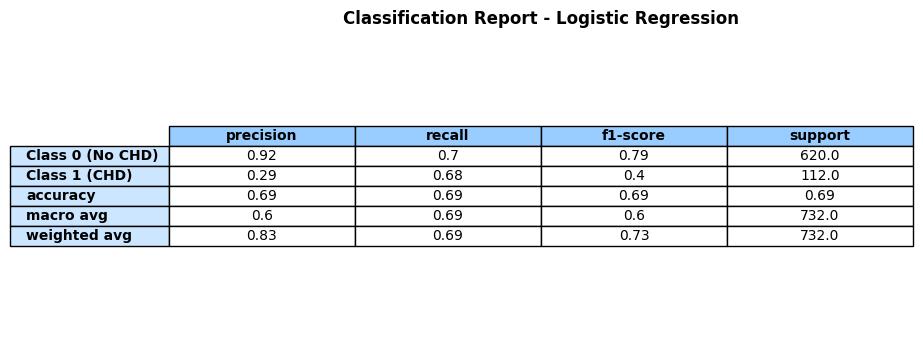

In [32]:
# === Buat classification report ===
report = classification_report(
    y_test, 
    y_pred, 
    target_names=["Class 0 (No CHD)", "Class 1 (CHD)"], 
    output_dict=True
)

df_report = pd.DataFrame(report).transpose().round(2)

# === Plot tabel jadi gambar ===
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(
    cellText=df_report.values,
    rowLabels=df_report.index,
    colLabels=df_report.columns,
    cellLoc='center',
    loc='center'
)

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Warna header biru
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header kolom
        cell.set_facecolor("#99ccff")
        cell.set_text_props(weight='bold')
    if col == -1:  # header baris
        cell.set_facecolor("#cce6ff")
        cell.set_text_props(weight='bold')

plt.title("Classification Report - Logistic Regression", fontsize=12, weight="bold")
plt.show()

In [30]:
print("Jumlah data:")
print(f"- Train : {X_train.shape[0]} baris")
print(f"- Test  : {X_test.shape[0]} baris\n")

print("Distribusi kelas di Train:")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))

print("\nDistribusi kelas di Test:")
print(y_test.value_counts(normalize=True).map("{:.2%}".format))


Jumlah data:
- Train : 2924 baris
- Test  : 732 baris

Distribusi kelas di Train:
TenYearCHD
0    84.78%
1    15.22%
Name: proportion, dtype: object

Distribusi kelas di Test:
TenYearCHD
0    84.70%
1    15.30%
Name: proportion, dtype: object


Analisis Kesuksesan Model

Berdasarkan hasil evaluasi:

Accuracy = 0.69 ( Lolos). Model mampu memprediksi 69% kasus dengan benar. Sudah memenuhi target minimal, tapi belum terlalu tinggi. Karena dataset imbalanced (kelas 0 jauh lebih banyak), akurasi bukan ukuran terbaik.

Recall = 0.68 (Lolos). Recall pada kelas 1 (CHD) sudah cukup bagus, artinya model bisa menangkap sebagian besar pasien yang berisiko terkena CHD. Ini penting dalam konteks medis, karena kita lebih baik mendeteksi pasien yang berisiko daripada salah melewatkan mereka.

Precision = 0.29 (Tidak Lolos). Artinya dari semua prediksi positif (CHD), hanya 29% yang benar-benar CHD. Model sering memberi false positive, sehingga bisa menyebabkan overdiagnosis. Dari sisi bisnis/medis, ini menimbulkan biaya tambahan (tes lanjutan, pemeriksaan yang tidak perlu).

F1-Score = 0.40 (Tidak Lolos) Karena precision rendah, maka F1 juga rendah Model belum seimbang dalam mendeteksi positif CHD dengan benar sekaligus meminimalkan kesalahan.

AUC = 0.73 (Lolos). Model punya kemampuan diskriminatif yang cukup baik untuk membedakan pasien CHD vs non-CHD. Tapi masih di bawah target ideal (≥0.75).

Kesimpulan Pencapaian Tujuan Bisnis

Tujuan utama: mendeteksi risiko CHD pada pasien secara dini.

Model ini cukup baik dari sisi recall, sehingga bisa membantu menandai pasien berisiko. Namun precision yang rendah berarti banyak pasien sehat ikut ditandai sebagai berisiko → berpotensi menambah biaya & mengurangi efisiensi screening. Secara bisnis, ini belum optimal. Recall bagus , tapi precision rendah membuat hasil screening kurang praktis dipakai langsung.

Rekomendasi Perbaikan Model

Tingkatkan Precision tanpa mengorbankan Recall. Gunakan threshold tuning pada probabilitas prediksi. Cari threshold optimal (bukan default 0.5) dengan precision-recall curve. Bisa memilih titik trade-off precision vs recall sesuai kebutuhan bisnis (lebih konservatif vs lebih inklusif).

Gunakan Resampling Techniques (SMOTE, ADASYN, atau Undersampling). Untuk menyeimbangkan distribusi kelas. Bisa meningkatkan generalisasi dan precision.

Gunakan Feature Engineering seperti menambahkan fitur baru (contoh: rasio umur/BP, BMI, gabungan faktor risiko). Seleksi fitur penting (pakai feature importance atau RFE).

Coba Model yang lebih kuat seperti Random Forest, XGBoost, LightGBM biasanya lebih baik menangani imbalance + interaksi antar fitur dibanding Logistic Regression. Kemudian bandingkan hasilnya dengan logistic regression sebagai baseline.

Kalau tujuan bisnis lebih berat ke recall (mencegah salah diagnosa pasien CHD), tetap gunakan class_weight=balanced. Tapi kalau precision harus lebih tinggi, bisa atur bobot kelas lebih condong ke 0